# Analysis of results from AOMA logged at h5 file

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy import signal
import dataloader_halogaland.dataloader as dl
import os

/Users/emilneby/miniforge3/envs/master/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
loader = dl.HDF5_result_loader(path=os.getcwd()+'/../Referencebased_Cov-SSI/results/output_AOMA.h5')

In [4]:
print(np.array(loader.hdf5_file[loader.periods[0]]['Frequencies']))

[0.05471402 0.12088063 0.1411283  0.20295097 0.21999254 0.28793736
 0.35328044 0.4295138  0.45041169 0.50942476 0.59920585 0.6217286
 0.69223605 0.79767477 0.9321516  0.98476221]


In [5]:
freqs = []
num = []

counter = 0
for period in loader.periods:
    counter += 1
    frequencies = np.array(loader.hdf5_file[period]['Frequencies'])
    freqs.extend(frequencies)
    num.extend(np.ones_like(frequencies)*counter)

In [10]:
#Load FEM results to use as a bench mark
hf = h5py.File(os.getcwd()+ '/../../../FEM/HalogalandModel_exportmodal.h5', 'r')
f = np.array(hf.get('f'))
f = f[:56]
print(f)

[0.05386703 0.1159167  0.1198293  0.1441354  0.2058538  0.2175673
 0.2281544  0.2673675  0.2764731  0.2792568  0.28367    0.2860988
 0.348027   0.3974806  0.4243394  0.4380004  0.4381267  0.4511921
 0.4627525  0.4763434  0.4797579  0.4806404  0.4827925  0.4832696
 0.4991885  0.503346   0.5235713  0.5267565  0.5290912  0.5592325
 0.5686418  0.5850167  0.5863821  0.5914302  0.602249   0.6458548
 0.6503595  0.6774036  0.6815385  0.6898496  0.7074438  0.7086733
 0.7845061  0.7878422  0.788882   0.8617281  0.8821169  0.8828331
 0.8905289  0.9032722  0.9232758  0.9482778  0.9493794  0.9494863
 0.9678676  0.9839966 ]


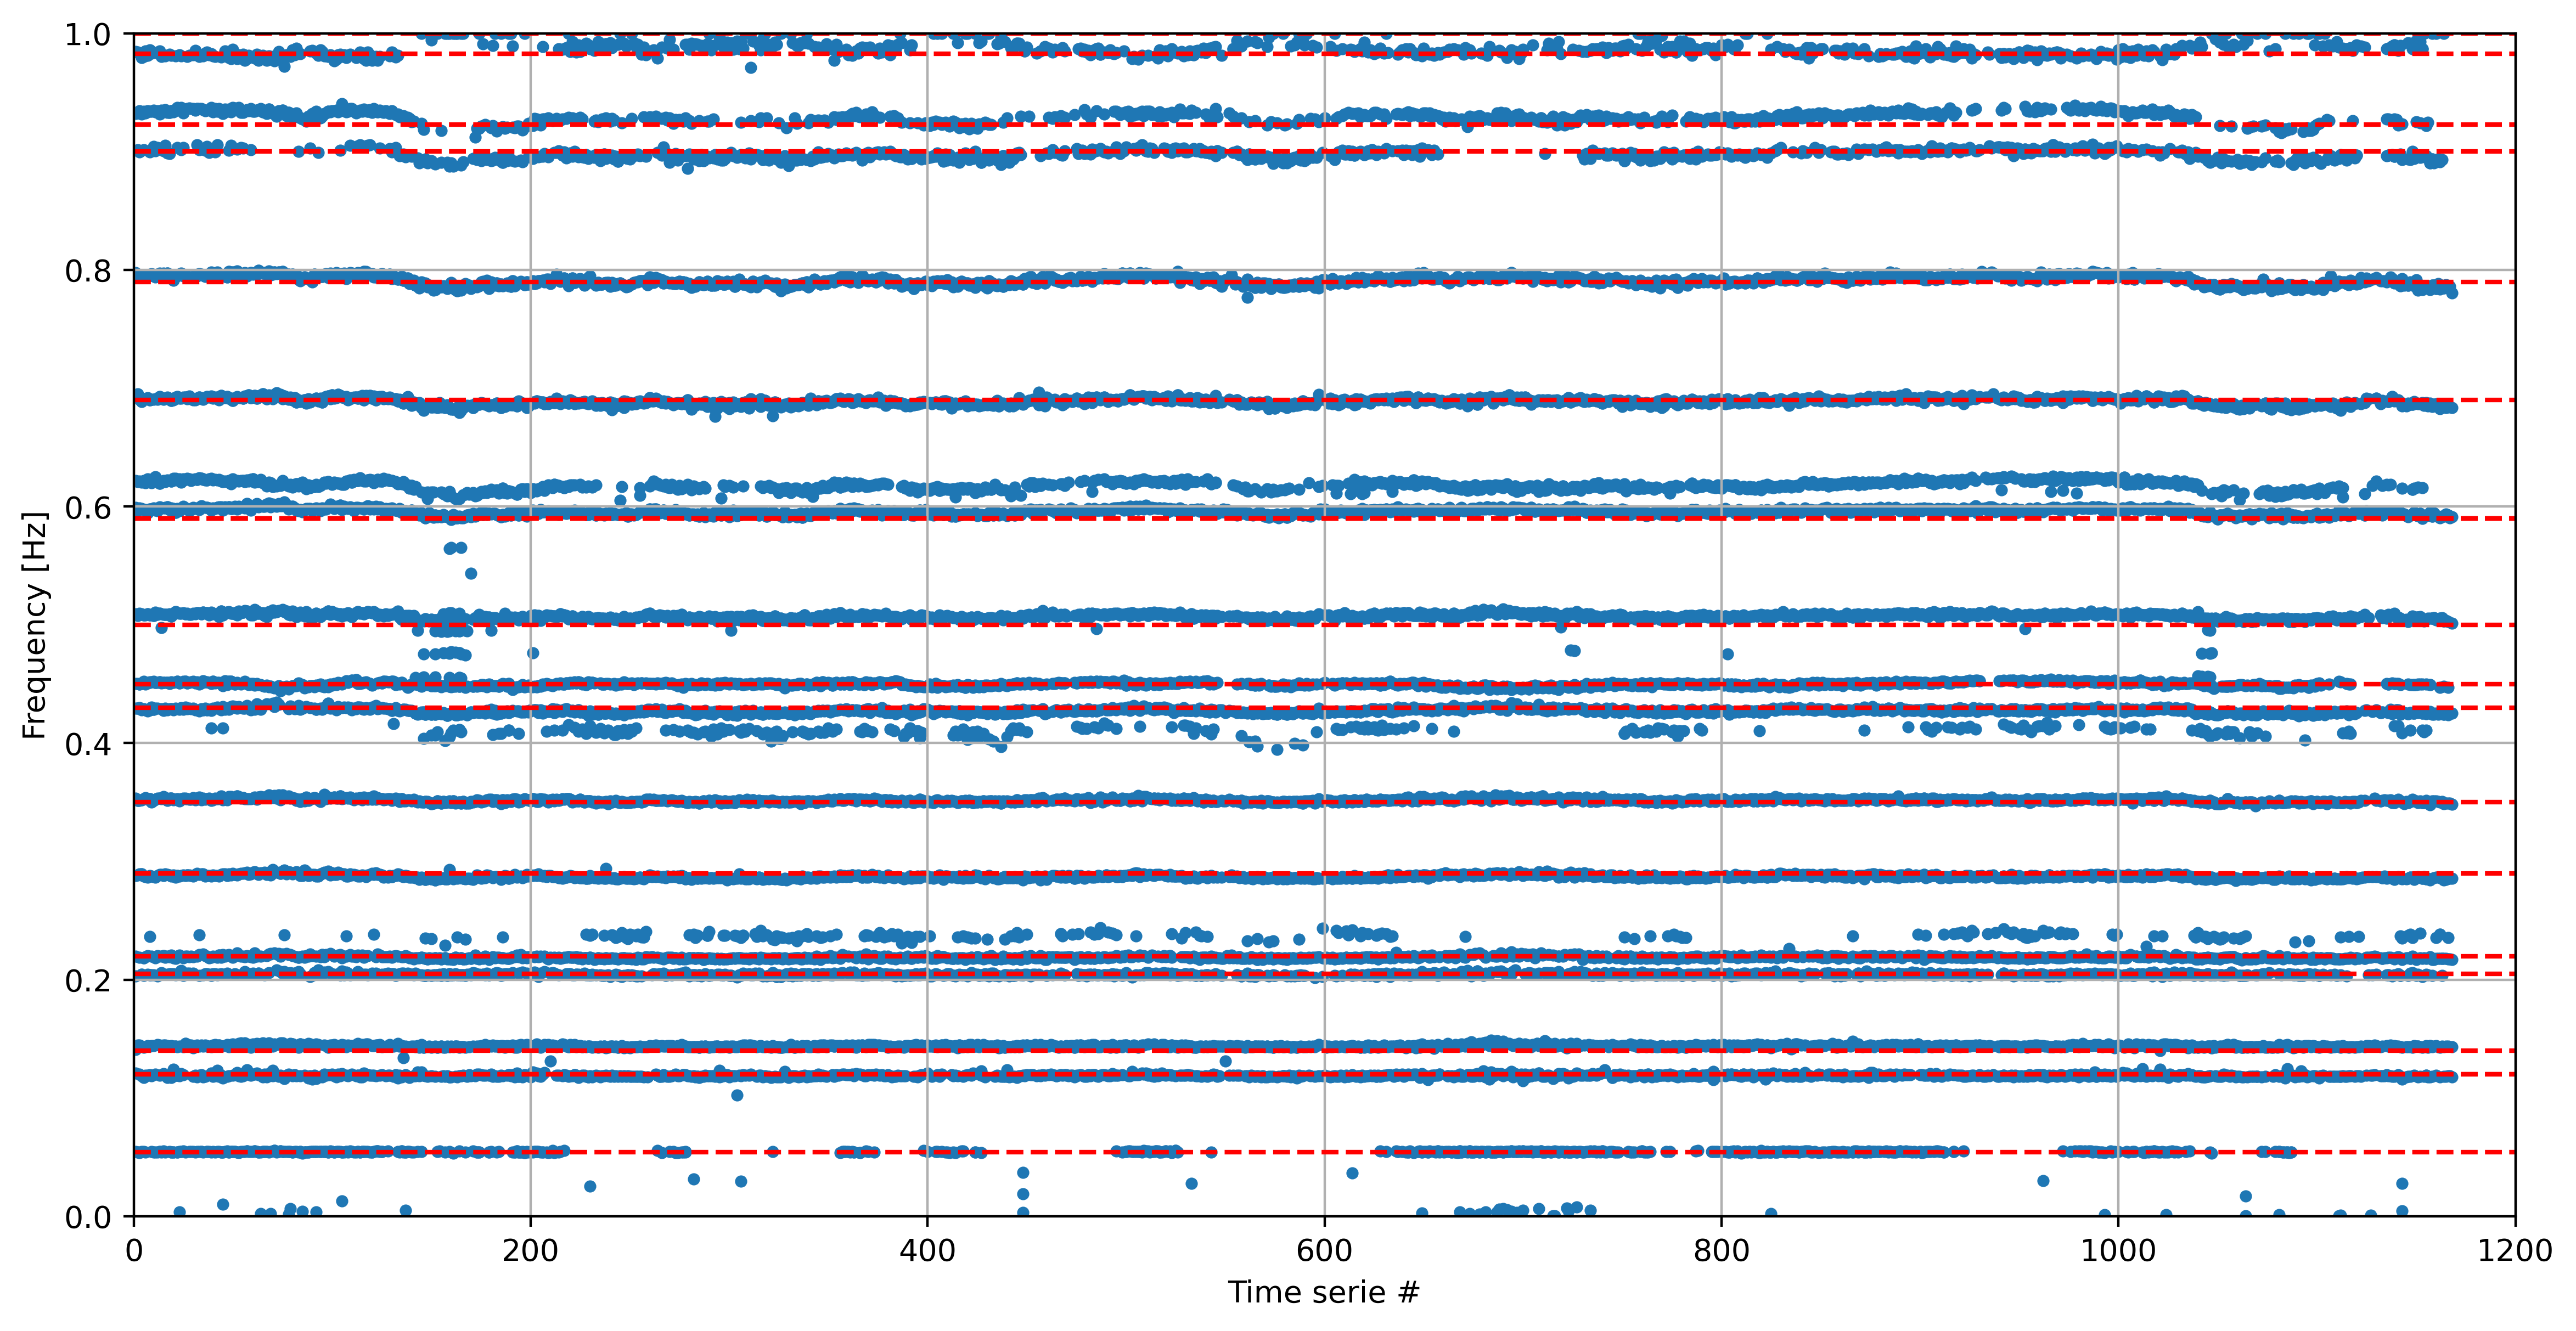

In [29]:
plt.figure(figsize=(14, 7), dpi=400)

plt.axhline(y = 0.054, color = 'r', linestyle = '--')
plt.axhline(y = 0.12, color = 'r', linestyle = '--')

#plt.axhline(y = 0.40, color = 'r', linestyle = '--')
plt.axhline(y = 0.59, color = 'r', linestyle = '--')

plt.axhline(y = 0.12, color = 'r', linestyle = '--')
plt.axhline(y = 0.14, color = 'r', linestyle = '--')
plt.axhline(y = 0.205, color = 'r', linestyle = '--')
plt.axhline(y = 0.22, color = 'r', linestyle = '--')
plt.axhline(y = 0.29, color = 'r', linestyle = '--')
plt.axhline(y = 0.35, color = 'r', linestyle = '--')
plt.axhline(y = 0.43, color = 'r', linestyle = '--')
plt.axhline(y = 0.50, color = 'r', linestyle = '--')
plt.axhline(y = 0.59, color = 'r', linestyle = '--')

plt.axhline(y = 0.69, color = 'r', linestyle = '--')
plt.axhline(y = 0.79, color = 'r', linestyle = '--')
plt.axhline(y = 0.90, color = 'r', linestyle = '--')
plt.axhline(y = 1.0, color = 'r', linestyle = '--')
plt.axhline(y = 0.45, color = 'r', linestyle = '--')
plt.axhline(y = 0.59, color = 'r', linestyle = '--')
plt.axhline(y = 0.923, color = 'r', linestyle = '--')
plt.axhline(y = 0.983, color = 'r', linestyle = '--')
plt.scatter(np.array(num), np.array(freqs), marker='.')
plt.ylim((0,1))
plt.xlim((0, 1200))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time serie #')
plt.grid()
plt.savefig('freq_vs_time.jpg')
plt.show()
